<a href="https://colab.research.google.com/github/Tema13379/2intensiv2/blob/main/50%D0%BD%D0%B050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import xgboost as xgb
from imblearn.over_sampling import SMOTE

train_df = pd.read_csv("trein.csv")

valid_df = pd.read_csv("val (1).csv")

убираем 0 чтобы их стало столькоже сколько и едениц едениц в файле 66

In [14]:
df_ones = valid_df[valid_df['target'] == 1]

df_zeros = valid_df[valid_df['target'] == 0].head(66)

filtered_df = pd.concat([df_zeros, df_ones])

valid_df = filtered_df.reset_index(drop=True)
valid_df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,1,2,0,0,16,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2,4,0,0,18,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2,9,0,0,93,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,0,12,0,0,108,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256261
4,0,14,0,0,120,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,2228,1,0,2160,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.291006
128,0,3256,1,0,773,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.264948
129,0,1150,1,0,2223,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.339800
130,1,1150,1,0,2223,0.0,1.0,1.0,1.0,1.0,...,240.0,240.0,240.0,4717500.0,4717500.0,4717500.0,4717500.0,4717500.0,4717500.0,0.339800


In [17]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

In [20]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [21]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Количество')

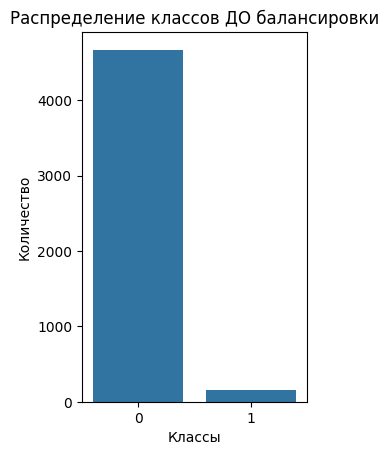

In [22]:
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Распределение классов ДО балансировки')
plt.xlabel('Классы')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

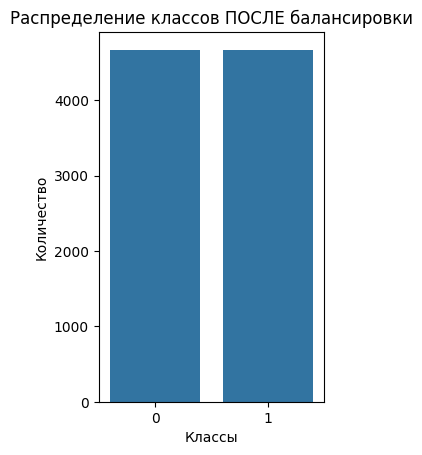

In [23]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('Распределение классов ПОСЛЕ балансировки')
plt.xlabel('Классы')
plt.ylabel('Количество')

In [24]:
dtrain = xgb.DMatrix(X_train_balanced, label=y_train_balanced)
dval = xgb.DMatrix(X_val, label=y_val)

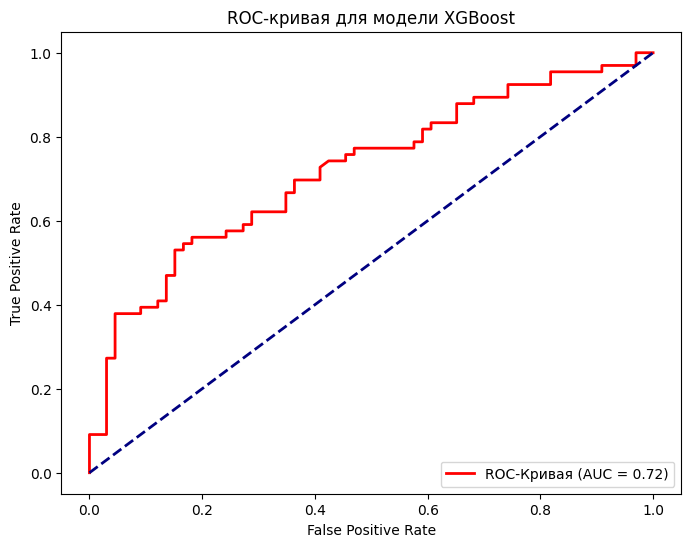

In [25]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.2,
    'random_state': 1
}
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)
y_prob = model.predict(dval)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower right')
plt.show()